**Yusuf Niko Fitranto**

**1306620033**

**Fisika A 2020**

**Pengolahan Citra Digital**


In [39]:
#Melakukan instalasi modul
!pip install numpy
!pip install scipy
!pip install scikit-image
!pip install scikit-learn
!pip install pillow
!pip install SimpleITK
!pip install opencv-python
!pip install matplotlib
!pip install IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.8 MB 149 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.2 

In [40]:
#Memastikan library versi terbaru
import skimage
print(skimage.__version__)
import numpy
print(numpy.__version__)
import PIL
print(PIL.__version__)

0.18.3
1.21.6
7.1.2


In [41]:
#Mengimpor library yang dibutuhkan
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Viewer requires Qt
  import sys


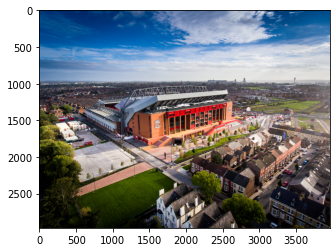

In [42]:
#Menampilkan gambar menggunakan PIL
import matplotlib.pyplot as plt
from PIL import Image
Image = Image.open('/content/LFC-3.png')
plt.imshow(Image)

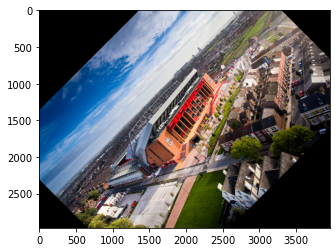

In [43]:
#Transformasi rotasi gambar
import matplotlib.pyplot as plt
from PIL import Image
Image = Image.open('/content/LFC-3.png')
angle = 45
out = Image.rotate(angle)
plt.imshow(out)

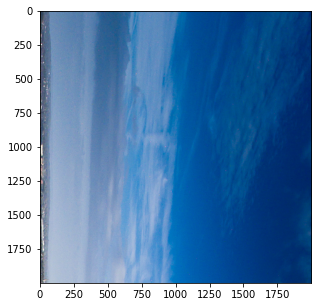

In [44]:
#Affine Transform
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('/content/LFC-3.png')
plt.figure(figsize=(5, 5))
plt.imshow(np.asarray(img))
T_pos1000 = np.array([
    [1, 0, 1000],
    [0, 1, 1000],
    [0, 0, 1]])
T_rotate = np.array([
    [0, -1, 0],
    [1, 0, 0],
    [0, 0, 1]])
T_scale = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 1]])
T_neg500 = np.array([
    [1, 0, -500],
    [0, 1, -500],
    [0, 0, 1]])
T = T_pos1000 @ T_rotate @ T_scale @ T_neg500
T_inv = np.linalg.inv(T)
img_transformed = img.transform((2000, 2000), Image.AFFINE, data=T_inv.flatten()[:6], resample=Image.NEAREST)
plt.imshow(np.asarray(img_transformed))

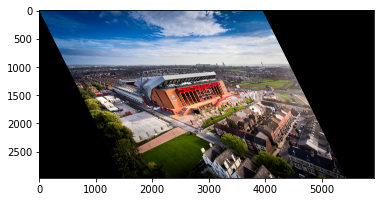

In [45]:
#Perspective Transform
import matplotlib.pyplot as plt
import sys
from PIL import Image

img = Image.open('/content/LFC-3.png')
width, height = img.size
m = -0.5
xshift = abs(m) * width
new_width = width + int(round(xshift))
img = img.transform((new_width, height), Image.AFFINE,
        (1, m, -xshift if m > 0 else 0, 0, 1, 0), Image.BICUBIC)
plt.imshow(img)

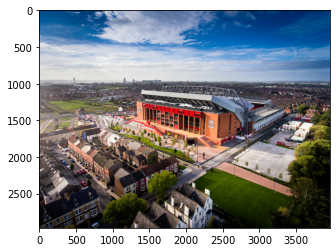

In [46]:
#Mirroring Transform
import matplotlib.pyplot as plt
from PIL import Image
 
img = Image.open('/content/LFC-3.png')
flip_img = img.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(flip_img)

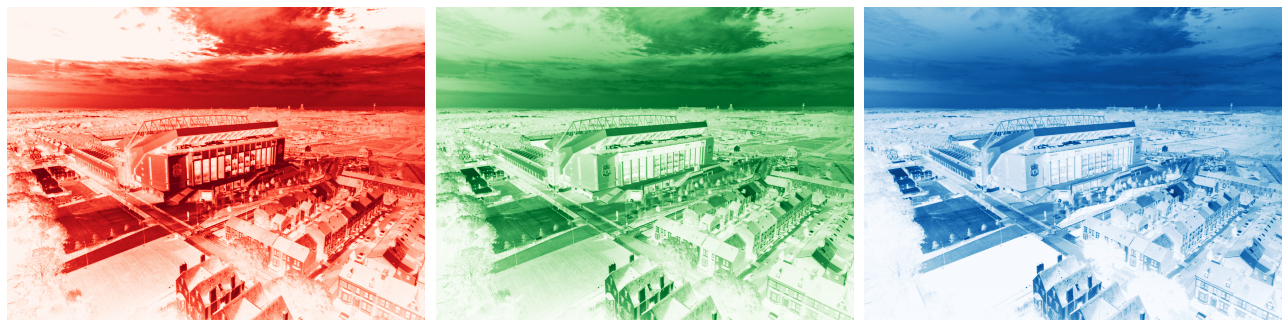

In [47]:
import matplotlib.pyplot as plt
from PIL import Image
 
img = Image.open('/content/LFC-3.png')
ch_r, ch_g, ch_b = img.split()
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(ch_r, cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(ch_g, cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(ch_b, cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show()

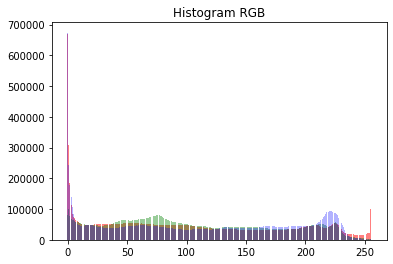

In [48]:
import matplotlib.pyplot as plt
from PIL import Image
Image = Image.open('/content/LFC-3.png')
pl = Image.histogram()
plt.bar(range(256), pl[:256], color='r', alpha=0.5)
plt.bar(range(256), pl[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), pl[2*256:], color='b', alpha=0.3)
plt.title("Histogram RGB")
plt.show()